<a href="https://colab.research.google.com/github/Saitejamacha/Data_Science_-_AI_ML/blob/main/Big_Basket_Data_10_08_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/BBData.csv')

In [ ]:
data

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [ ]:
data.isnull().sum()

,0
index,0
product,1
category,0
sub_category,0
brand,1
sale_price,0
market_price,0
type,0
rating,8626
description,115


In [ ]:
data.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [ ]:
data.describe(include = 'object')

,product,category,sub_category,brand,type,description
count,27554,27555,27555,27554,27555,27440
unique,23540,11,90,2313,426,21944
top,Turmeric Powder/Arisina Pudi,Beauty & Hygiene,Skin Care,Fresho,Face Care,A brand inspired by the Greek goddess of victo...
freq,26,7867,2294,638,1508,47


In [ ]:
data.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

In [ ]:
# Addressing the null values of product , description , brand and rating
data['product'] = data['product'].replace(np.nan,'unknown')
data['description'] = data['description'].replace(np.nan,'not known')
data['brand'] = data['brand'].replace(np.nan,'not known')


In [ ]:
data.isnull().sum()

,0
index,0
product,0
category,0
sub_category,0
brand,0
sale_price,0
market_price,0
type,0
rating,8626
description,0


In [ ]:
# handle the null values of the rating column

mean_rating = data.groupby('category')['rating'].mean()
mean_rating

,rating
category,
Baby Care,4.023790
"Bakery, Cakes & Dairy",3.911128
Beauty & Hygiene,3.930655
Beverages,4.084858
Cleaning & Household,3.956667
"Eggs, Meat & Fish",NaN
"Foodgrains, Oil & Masala",4.062198
Fruits & Vegetables,NaN
Gourmet & World Food,3.984410


In [ ]:
data['rating'] = data['rating'].fillna(data.groupby('category')['rating'].transform('mean'))

In [ ]:
data.isnull().sum()

,0
index,0
product,0
category,0
sub_category,0
brand,0
sale_price,0
market_price,0
type,0
rating,907
description,0


In [ ]:
data['rating'] = data['rating'].fillna(data['rating'].mean())

In [ ]:
data.isnull().sum()

,0
index,0
product,0
category,0
sub_category,0
brand,0
sale_price,0
market_price,0
type,0
rating,0
description,0


In [ ]:
data['index'].rename('product_id',inplace = True)

,product_id
0,1
1,2
2,3
3,4
4,5
...,...
27550,27551
27551,27552
27552,27553
27553,27554


In [ ]:
data.duplicated().sum()

np.int64(0)

# Which categories offer the highest average discount percentage?

In [ ]:
data

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori..."


In [ ]:
data['discount'] = data['market_price'] - data['sale_price']

In [ ]:
data

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,discount
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.00,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,0.00
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.00,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",0.00
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",131.00
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,27.00
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.00,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,0.00
...,...,...,...,...,...,...,...,...,...,...,...
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...,49.80
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...,7.50
27552,27553,Peri-Peri Sweet Potato Chips,Gourmet & World Food,"Snacks, Dry Fruits, Nuts",FabBox,200.00,200.0,Nachos & Chips,3.8,We have taken the richness of Sweet Potatoes (...,0.00
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori...",99.00


In [ ]:
data['discount_%'] = round(data['discount']/data['market_price'],2)*100

In [ ]:
data['discount_%']

,discount_%
0,0.0
1,0.0
2,52.0
3,15.0
4,0.0
...,...
27550,20.0
27551,10.0
27552,0.0
27553,20.0


In [ ]:
avg_discout_per_category = data.groupby('category')['discount_%'].mean().sort_values(ascending=False)

In [ ]:
avg_discout_per_category

,discount_%
category,
"Kitchen, Garden & Pets",22.185754
Fruits & Vegetables,21.247756
Beauty & Hygiene,12.345367
"Foodgrains, Oil & Masala",11.840060
Cleaning & Household,10.798131
Beverages,9.558192
"Eggs, Meat & Fish",8.048571
Gourmet & World Food,7.864392
"Bakery, Cakes & Dairy",7.674501


/tmp/ipython-input-3943253859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = avg_discout_per_category.index, y = avg_discout_per_category.values,palette= 'coolwarm')


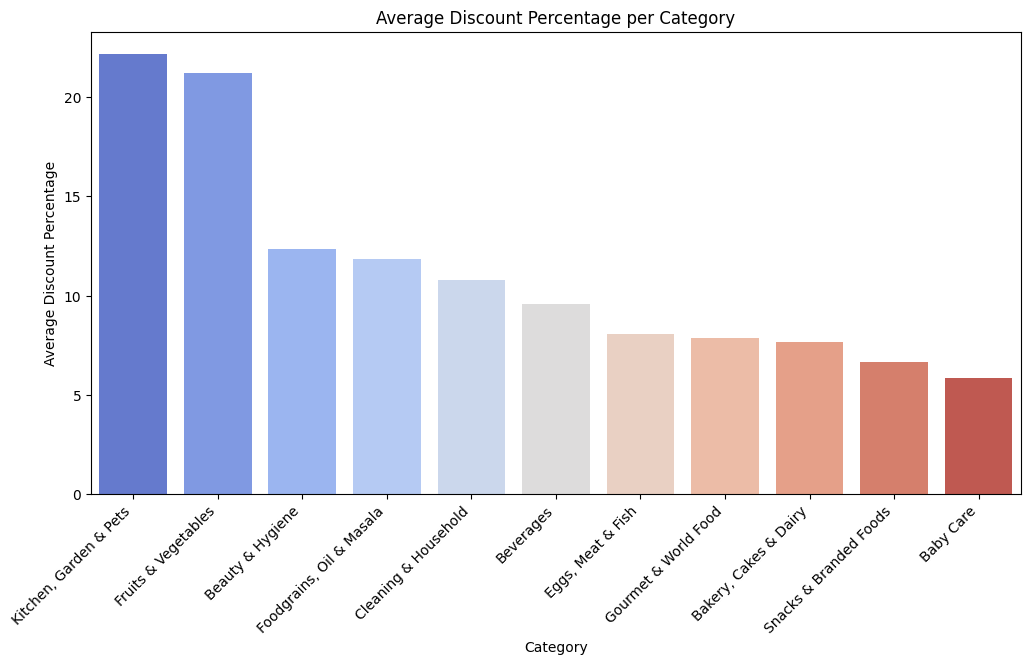

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = avg_discout_per_category.index, y = avg_discout_per_category.values,palette= 'coolwarm')
plt.title('Average Discount Percentage per Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation = 45 , ha = 'right')
plt.show()

# Which sub categories offer the highest average rating ?


In [ ]:
# Which sub categories offer the highest average rating ?

avg_rating_per_subcategory = data.groupby('sub_category')['rating'].mean().sort_values(ascending=False)

In [32]:
avg_rating_per_subcategory

,rating
sub_category,
Detergents & Dishwash,4.198365
Water,4.169698
Baby Food & Formula,4.166070
Energy & Soft Drinks,4.159161
Biscuits & Cookies,4.151911
...,...
Gardening,3.627807
Cookware & Non Stick,3.609858
Steel Utensils,3.590807


/tmp/ipython-input-599635302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = avg_rating_per_subcategory.index, y = avg_rating_per_subcategory.values,palette= 'coolwarm')


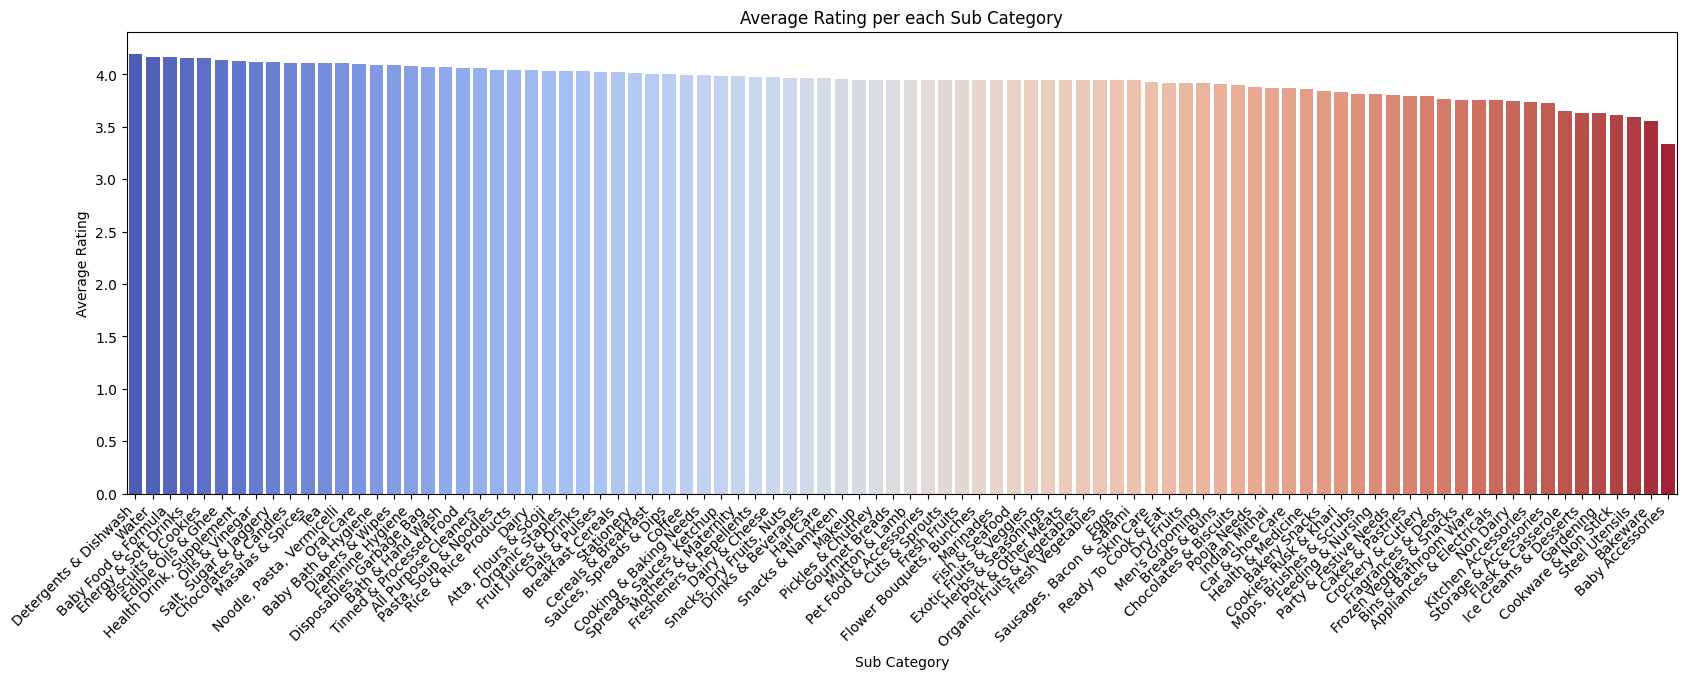

In [36]:
plt.figure(figsize = (20,6))
sns.barplot(x = avg_rating_per_subcategory.index, y = avg_rating_per_subcategory.values,palette= 'coolwarm')
plt.title('Average Rating per each Sub Category')
plt.xlabel('Sub Category')
plt.ylabel('Average Rating')
plt.xticks(rotation = 45 , ha = 'right')
plt.show()

 # Top 10 brands with highest average discount

In [41]:
 # Top 10 brands with highest average discount and visualization
 avg_discount_brand = data.groupby('brand')['discount_%'].mean().sort_values(ascending=False)

In [42]:
avg_discount_brand

,discount_%
brand,
Mud,80.000000
Jensons,74.333333
Mansaa,71.333333
Triones,69.750000
Mondsub,69.000000
...,...
NNF,0.000000
NOCD,0.000000
Naagin,0.000000


/tmp/ipython-input-2412408858.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_10_brands.index, y = top_10_brands.values,palette= 'coolwarm')


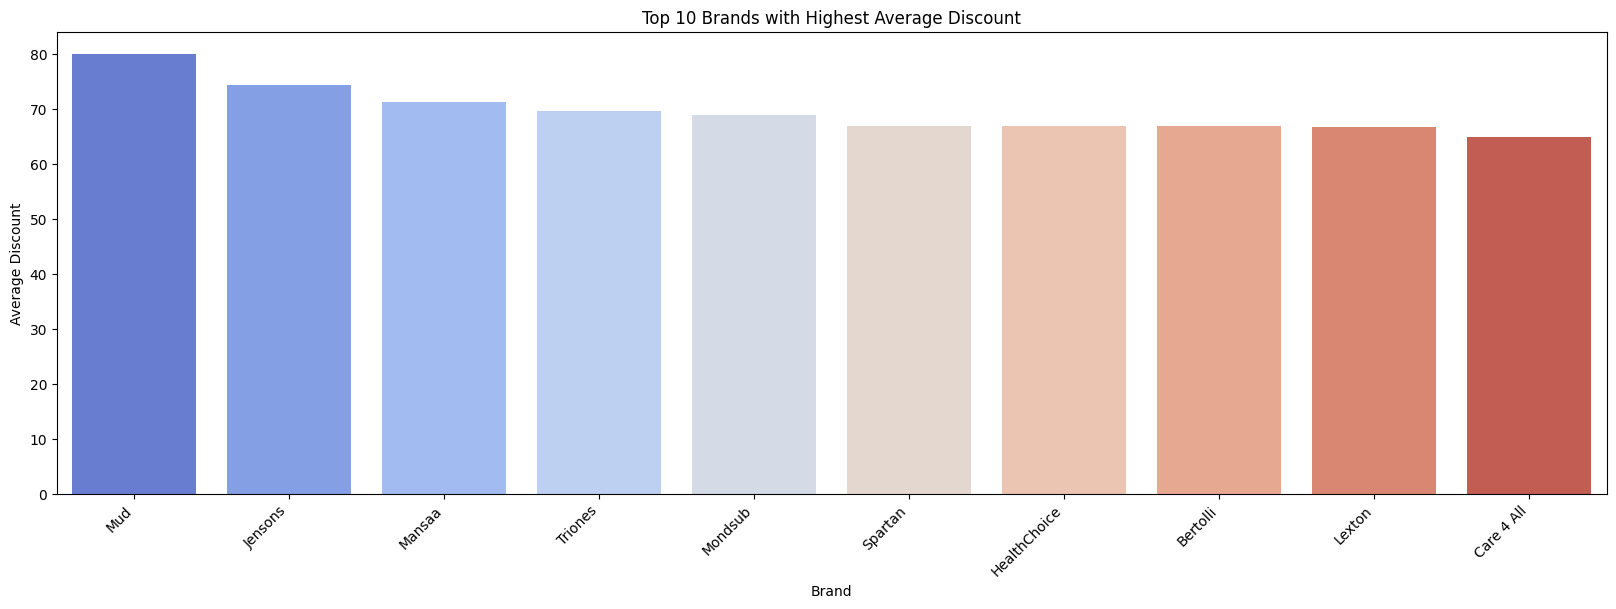

In [52]:
 # Top 10 brands with highest average discount and visualization
 avg_discount_brand = data.groupby('brand')['discount_%'].mean().sort_values(ascending=False)
 top_10_brands = avg_discount_brand.head(10)
 plt.figure(figsize = (20,6))
 sns.barplot(x = top_10_brands.index, y = top_10_brands.values,palette= 'coolwarm')
 plt.xticks(rotation = 45 , ha = 'right')
 plt.title('Top 10 Brands with Highest Average Discount')
 plt.xlabel('Brand')
 plt.ylabel('Average Discount')
 plt.show()
